# 54. K-Means Clustering (Practical)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'Data/iris_raw.csv')
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## 54.1 Making Clusters of Data

- Use K-mean clustering when **your data is linearly separable**

### Check the data if it is linearly separable

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


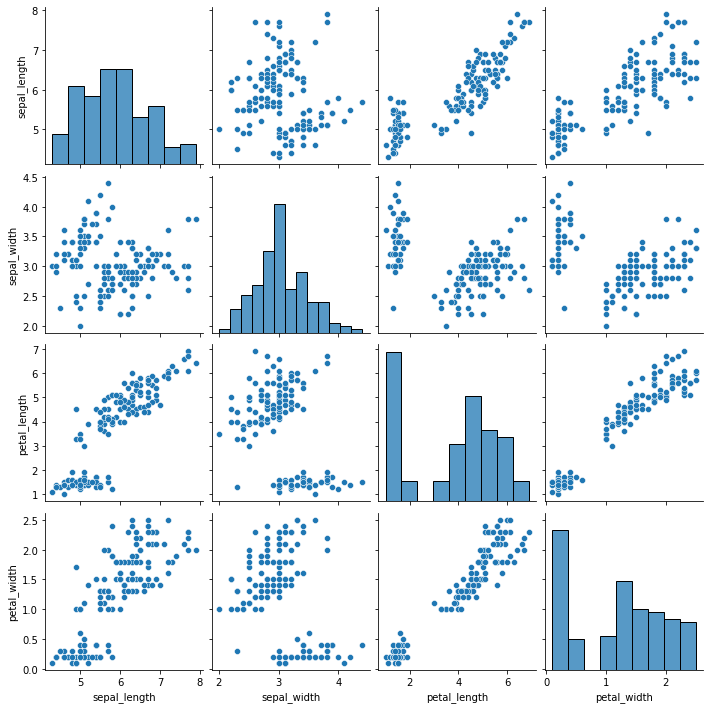

In [3]:
sns.pairplot(data=dataset)
plt.show()

- In supervised learning, the data is split into training and testing data
- In unsupervised learning, data is not split into training and testing data b/c the data is unlabelled

### 54.1.1 Find Number of clusters

In [7]:
from sklearn.cluster import KMeans

In [14]:
# Use a loop to find best number of clusters from 2 to 20
wcss = []

for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_) # it assings value of wcss {Elbow graph}

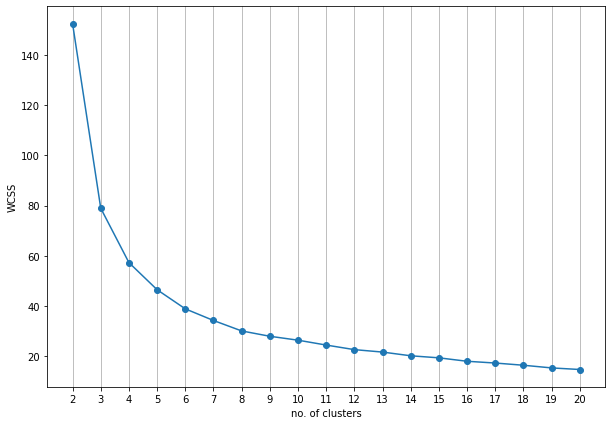

In [29]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(2,21)], wcss, marker='o')
plt.xlabel('no. of clusters')
plt.xticks([i for i in range(2,21)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show()

#### Elbow point = 3
**It means that will have 3 number of clusters** 

In [30]:
kmn = KMeans(n_clusters=3)
kmn.fit_predict(dataset)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [32]:
dataset['Predict'] = kmn.fit_predict(dataset)

In [33]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,predict,Predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,1,0
148,6.2,3.4,5.4,2.3,1,0


C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


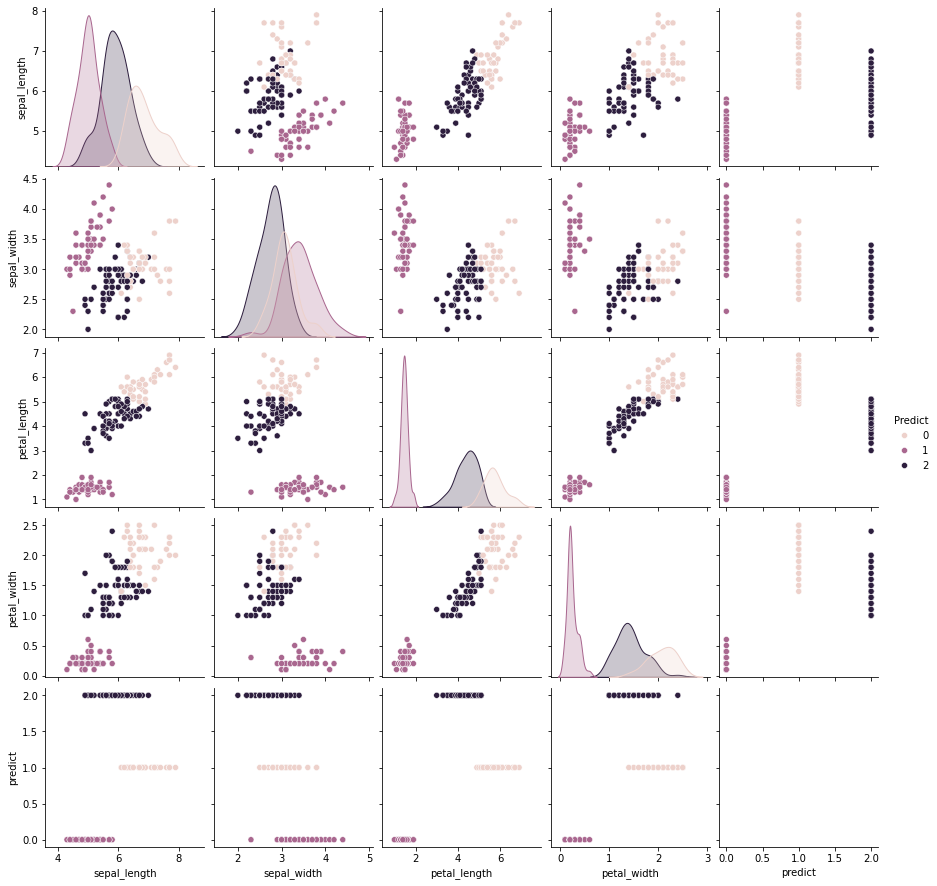

In [39]:
sns.pairplot(data=dataset, hue='Predict')
plt.savefig(r"Generated_images/raw-iris-clustering-predict.jpg")
plt.show()

## 54.2 Making raw data with original data

In [35]:
org_dataset = pd.read_csv(r'Data/iris.csv')
org_dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


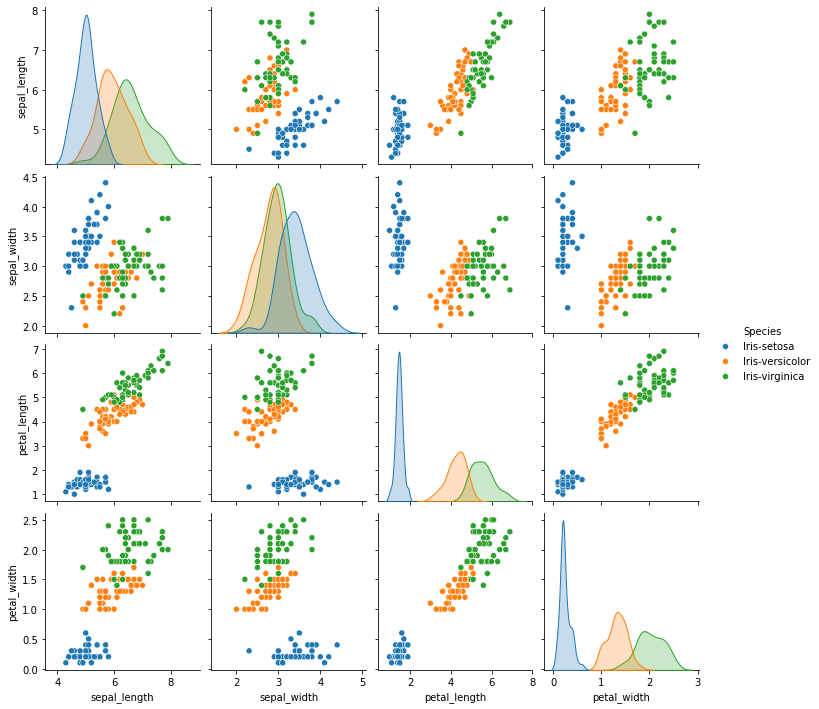

In [40]:
sns.pairplot(data=org_dataset, hue='Species')
plt.savefig(r"Generated_images/raw-iris-clustering-original-data.jpg")
plt.show()